In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Data Exploration
Check the structure of our dataset, look for nulls, and understand the feature types.

In [2]:
df.info()
df.describe()
df.nunique()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


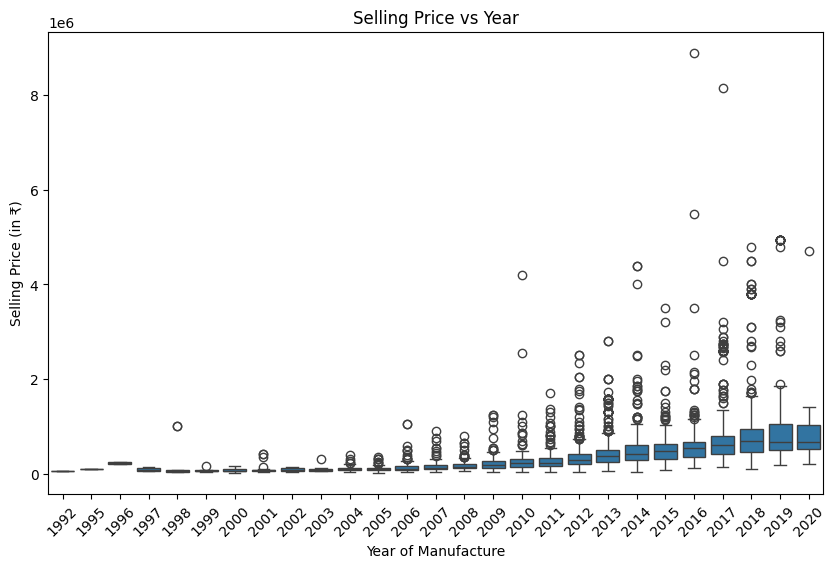

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title("Selling Price vs Year")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (in ₹)")
plt.show()

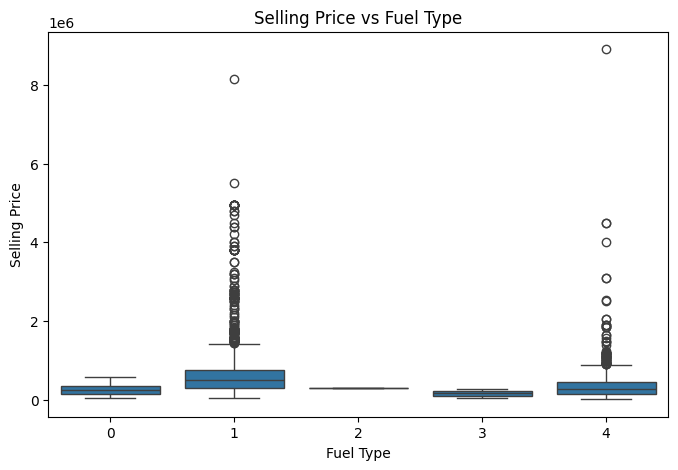

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title("Selling Price vs Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()

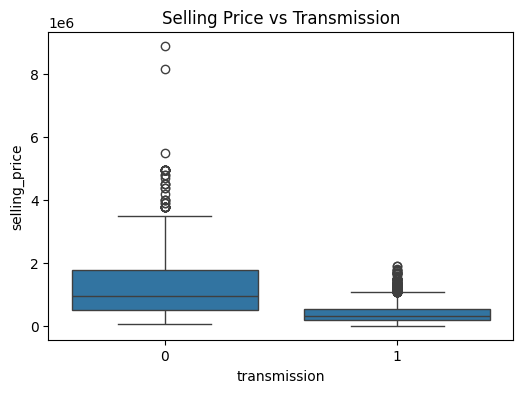

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title("Selling Price vs Transmission")
plt.show()

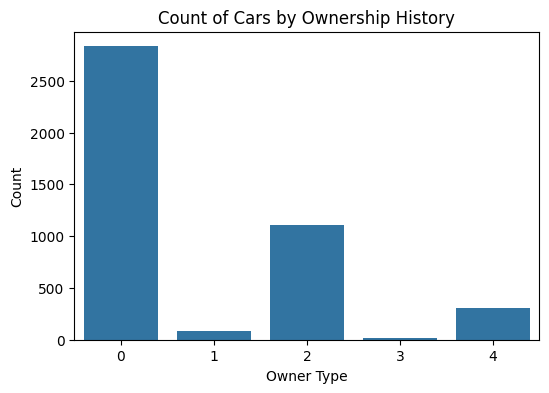

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='owner', data=df)
plt.title("Count of Cars by Ownership History")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.show()

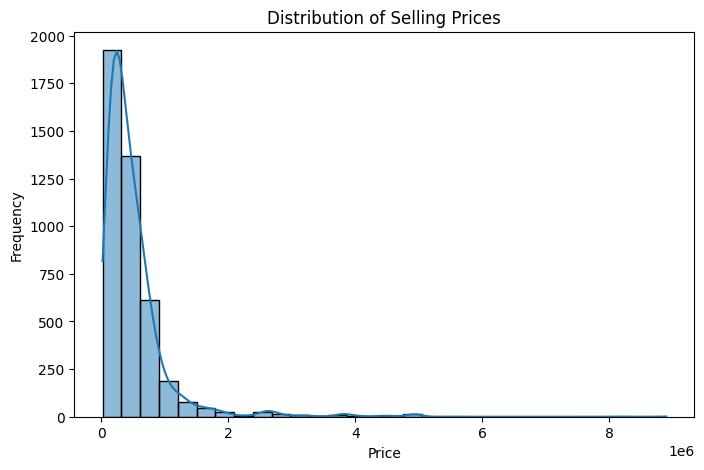

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Data Cleaning + Feature Engineering

# Dropping car name because it's not useful as-is
df.drop(columns=["name"], inplace=True, errors='ignore')

# Encode categorical features
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [4]:
# Split the Data

# Define input and output
X = df.drop(columns=["selling_price"])
y = df["selling_price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train the Models

# Train Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Train Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [6]:
# Evaluate the Models

def evaluate_model(model):
    y_pred = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("Random Forest:")
evaluate_model(rf_model)

print("\nGradient Boosting:")
evaluate_model(gb_model)

Random Forest:
MAE: 169243.92989563596
RMSE: 393381.45215844986

Gradient Boosting:
MAE: 174824.13205795066
RMSE: 396038.79143931455


In [7]:
# Cross-Validation

rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_root_mean_squared_error')

print("RF CV RMSE:", -rf_scores.mean())
print("GB CV RMSE:", -gb_scores.mean())

RF CV RMSE: 338419.0383969703
GB CV RMSE: 354170.2052489485
